Projekt MNwS - Aleksander Folfas 411052

In [3]:
import numpy as np
from scipy.stats import kstest
import matplotlib.pyplot as plt

Zadanie 7


Za pomocą odpowiednich symulacji zbadać moc testu Kołmogorowa-Smirnowa w przypadku, gdy
rozważane próbki danych pochodzą w rozkładów normalnych o tej samej wartości oczekiwanej, ale o
różnych odchyleniach standardowych. Rozważyć różne wartości oczekiwane. Uzyskane wyniki należy
przedstawić na odpowiednich wykresach ilustrujących moce testów z uwzględnieniem:
- liczby danych (można rozważać różne liczebności w każdej z próbek),
- odchyleń standardowych.

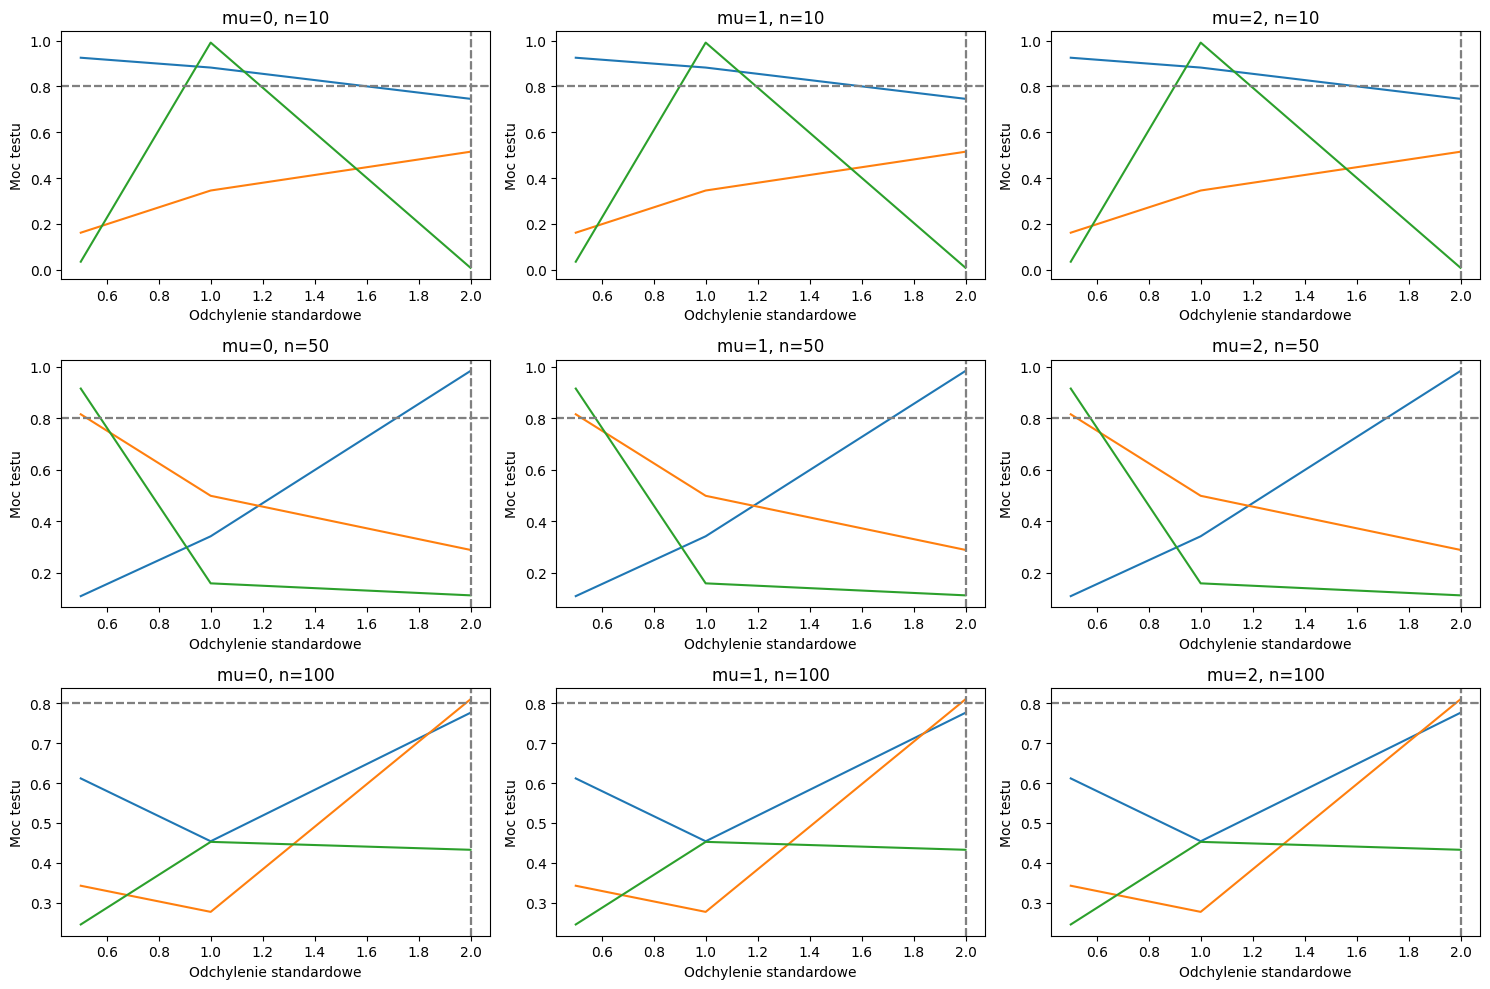

In [4]:
def test_power(data1, data2, alpha=0.05):
    """
    Oblicza moc testu Kołmogorowa-Smirnowa dla dwóch zestawów danych.

    :param data1: numpy array z danymi pierwszej próbki
    :param data2: numpy array z danymi drugiej próbki
    :param alpha: poziom istotności (domyślnie 0.05)
    :return: wartość float reprezentującą moc testu Kołmogorowa-Smirnowa
    """
    # Standaryzacja danych
    data1 = (data1 - np.mean(data1)) / np.std(data1)
    data2 = (data2 - np.mean(data2)) / np.std(data2)

    # Test Kołmogorowa-Smirnowa
    ks_stat, ks_p = kstest(data1, 'norm', args=(np.mean(data2), np.std(data2)))
    ks_power = 1 - kstest(np.random.normal(np.mean(data2), np.std(data2), len(data1)), 'norm', args=(np.mean(data2), np.std(data2)), N=10000)[1]

    return ks_power

# Wartości oczekiwane
mu_list = [0, 1, 2]

# Odchylenia standardowe
sigma_list = [0.5, 1, 2]

# Liczba próbek
n_list = [10, 50, 100]

# Macierz do przechowywania wyników
powers = np.zeros((len(mu_list), len(sigma_list), len(n_list)))

# Przeprowadzenie symulacji
for i, mu in enumerate(mu_list):
    for j, sigma in enumerate(sigma_list):
        for k, n in enumerate(n_list):
            data1 = np.random.normal(mu, sigma, n)
            data2 = np.random.normal(mu, 2 * sigma, n)
            powers[i, j, k] = test_power(data1, data2)

# Wykresy mocy testu dla różnych wartości oczekiwanych i odchyleń standardowych
fig, axes = plt.subplots(nrows=len(n_list), ncols=len(mu_list), figsize=(15, 10))
for i, n in enumerate(n_list):
    for j, mu in enumerate(mu_list):
        for k, sigma in enumerate(sigma_list):
            ax = axes[i, j]
            ax.plot(sigma_list, powers[:, k, i])
            ax.set_title(f"mu={mu}, n={n}")
            ax.set_xlabel('Odchylenie standardowe')
            ax.set_ylabel('Moc testu')
            ax.axhline(y=0.8, linestyle='--', color='gray')
            ax.axvline(x=2, linestyle='--', color='gray')
plt.tight_layout()
plt.show()
